In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import soundfile

file = "SSE3 Kick 38.wav"
data, samplerate = soundfile.read(file)
soundfile.write(file, data, samplerate, subtype='PCM_16')

wr = wave.open(file, 'r')
f_rate = wr.getframerate()

sz = 44100 # Read and process 1 second at a time.
da = np.frombuffer(wr.readframes(samplerate), dtype=np.int16)
left, right = da[0::2], da[1::2]

In [2]:
def visualize(path: str):
   
    raw = wave.open(path)
     
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, "int16")
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.show()


In [3]:
lf, rf = abs(np.fft.rfft(left)), abs(np.fft.rfft(right))


In [13]:
import librosa
import librosa.display
def plot_log_spectrum(signal, sampling_rate):
    f, t, Sxx = signal.spectrogram(signal, fs=sampling_rate)
    plt.pcolormesh(t, f, np.log(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Log Spectrogram')
    plt.show()

def plot_mfccs(signal, sampling_rate):
    S = librosa.feature.melspectrogram(y=signal, sr=sampling_rate)
    S_db = librosa.power_to_db(S)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sampling_rate)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.tight_layout()
    plt.show()

def plot_spectral_envelope(signal, sampling_rate):
    f, t, Sxx = signal.spectrogram(signal, fs=sampling_rate)
    spec_env = np.mean(Sxx, axis=1)
    plt.plot(f, np.log(spec_env))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Log Spectral Envelope')
    plt.title('Spectral Envelope')
    plt.show()

def plot_mel_spectrogram(signal, sampling_rate):
    S = librosa.feature.melspectrogram(y=signal, sr=sampling_rate)
    S_db = librosa.power_to_db(S)
    librosa.display.specshow(S_db, sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

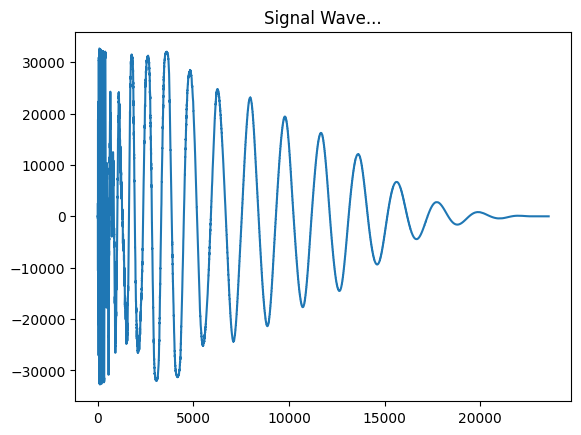

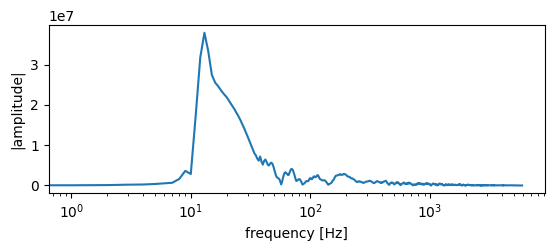

In [4]:

plt.figure(1)
visualize(file)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(rf)

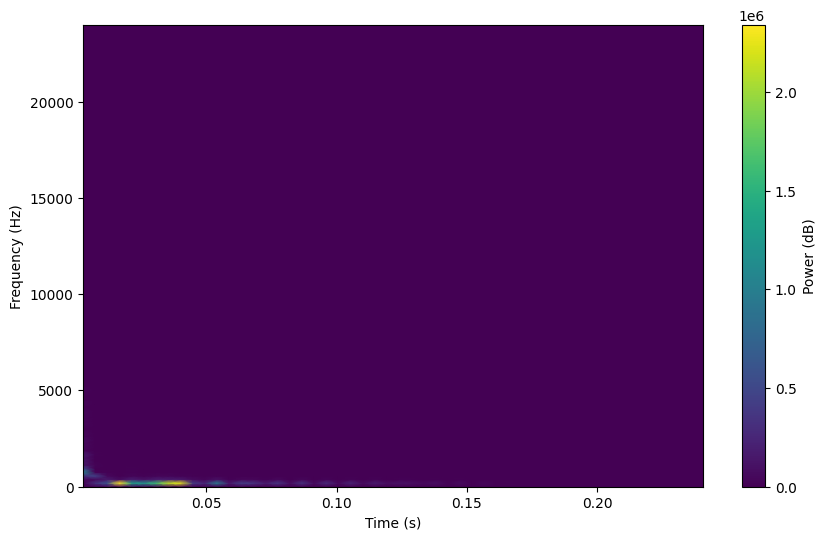

In [5]:
import scipy.io.wavfile
from scipy.signal import spectrogram

sample_rate, audio_data = scipy.io.wavfile.read(file)
if audio_data.dtype != np.int16:
    raise ValueError("Audio data must be 16-bit.")

# Calculate the Short-Time Fourier Transform (STFT)
frequencies, times, amplitudes = spectrogram(left, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, amplitudes, shading='gouraud')
plt.colorbar(label='Power (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.show()

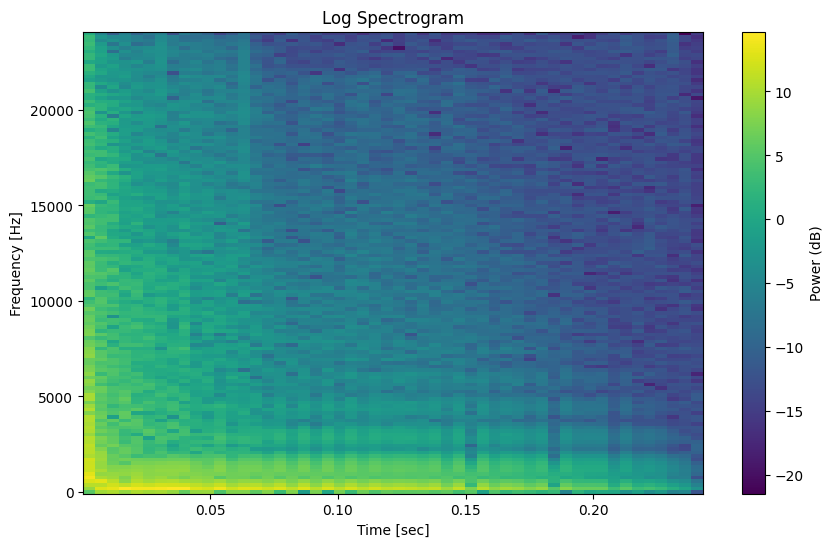

In [22]:
# Calculate the Short-Time Fourier Transform (STFT)
frequencies, times, amplitudes = spectrogram(left, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.log(amplitudes))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Power (dB)')
plt.title('Log Spectrogram')
plt.show()



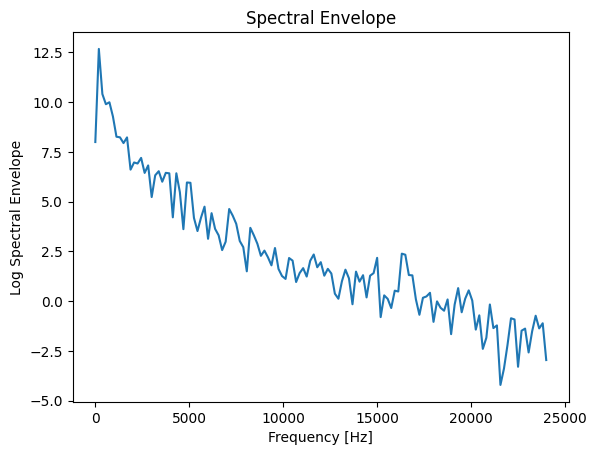

In [19]:
spec_env = np.mean(amplitudes, axis=1)
plt.plot(frequencies, np.log(spec_env))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Spectral Envelope')
plt.title('Spectral Envelope')
plt.show()

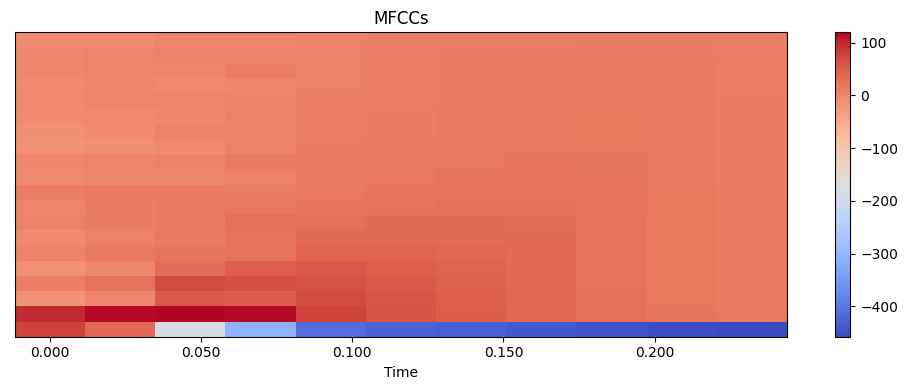

In [24]:
samples, sample_rate = librosa.load(file)

S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
S_db = librosa.power_to_db(S)
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


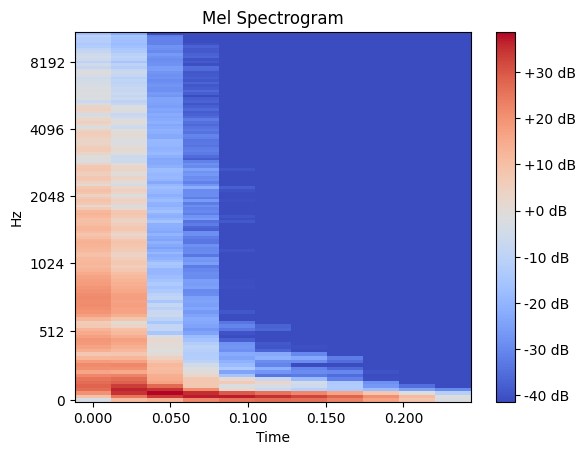

In [25]:
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
S_db = librosa.power_to_db(S)
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()